<a href="https://colab.research.google.com/github/arshadzahangirchowdhury/EMD/blob/main/StressElementVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sliders for stress components
σ_xx = widgets.FloatSlider(min=-100, max=100, value=30, step=5, description='σ_xx')
σ_yy = widgets.FloatSlider(min=-100, max=100, value=20, step=5, description='σ_yy')
σ_zz = widgets.FloatSlider(min=-100, max=100, value=10, step=5, description='σ_zz')
σ_xy = widgets.FloatSlider(min=-50, max=50, value=10, step=5, description='σ_xy')
σ_yz = widgets.FloatSlider(min=-50, max=50, value=0, step=5, description='σ_yz')
σ_zx = widgets.FloatSlider(min=-50, max=50, value=0, step=5, description='σ_zx')

# Button to update plot
button = widgets.Button(description="Update Plot")
output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output(wait=True)

        # Construct stress tensor
        stress_tensor = np.array([
            [σ_xx.value, σ_xy.value, σ_zx.value],
            [σ_xy.value, σ_yy.value, σ_yz.value],
            [σ_zx.value, σ_yz.value, σ_zz.value]
        ])

        eigvals, eigvecs = np.linalg.eigh(stress_tensor)

        fig = go.Figure()

        # Coordinate axes
        axes = np.eye(3)
        for i, color in enumerate(['red', 'green', 'blue']):
            fig.add_trace(go.Scatter3d(
                x=[0, axes[i, 0]],
                y=[0, axes[i, 1]],
                z=[0, axes[i, 2]],
                mode='lines',
                line=dict(color=color, width=4),
                name=f'{["x","y","z"][i]}-axis'
            ))

        # Eigenvectors
        for i in range(3):
            v = eigvecs[:, i]
            fig.add_trace(go.Scatter3d(
                x=[0, v[0]],
                y=[0, v[1]],
                z=[0, v[2]],
                mode='lines+text',
                text=[None, f"λ={eigvals[i]:.2f}"],
                line=dict(color='black', width=6),
                name=f'Eigenvector {i+1}'
            ))

        fig.update_layout(
            title="Principal Stresses and Directions",
            scene=dict(aspectmode='cube'),
            margin=dict(l=0, r=0, b=0, t=40)
        )

        fig.show()

button.on_click(on_button_click)

# Show UI
ui = widgets.VBox([σ_xx, σ_yy, σ_zz, σ_xy, σ_yz, σ_zx, button])
display(ui, output)


Output()

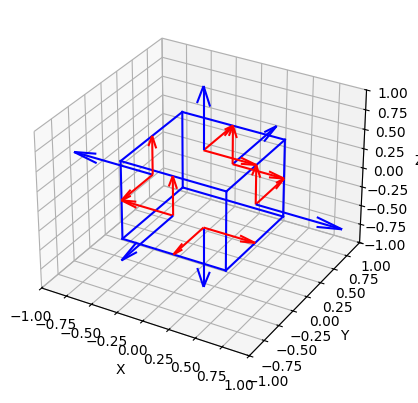

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Half side length for cube centered at origin
half = 0.5

# Define the vertices of the unit cube centered at the origin
points = [
    (-half, -half, -half),
    ( half, -half, -half),
    ( half,  half, -half),
    (-half,  half, -half),
    (-half, -half,  half),
    ( half, -half,  half),
    ( half,  half,  half),
    (-half,  half,  half)
]

# Define the edges connecting the vertices
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

# Plot each edge of the cube in blue
for e in edges:
    x = [points[e[0]][0], points[e[1]][0]]
    y = [points[e[0]][1], points[e[1]][1]]
    z = [points[e[0]][2], points[e[1]][2]]
    ax.plot(x, y, z, color='blue')

# Enable the grid
ax.grid(True)

# Extend axes beyond the cube for clear visibility
range_ext = 1.0
ax.set_xlim(-range_ext, range_ext)
ax.set_ylim(-range_ext, range_ext)
ax.set_zlim(-range_ext, range_ext)

# Axes styling
ax.xaxis.set_tick_params(color='black', labelcolor='black')
ax.yaxis.set_tick_params(color='black', labelcolor='black')
ax.zaxis.set_tick_params(color='black', labelcolor='black')
ax.xaxis._axinfo["axisline"]["color"] = "black"
ax.yaxis._axinfo["axisline"]["color"] = "black"
ax.zaxis._axinfo["axisline"]["color"] = "black"
ax.set_xlabel('X', color='black')
ax.set_ylabel('Y', color='black')
ax.set_zlabel('Z', color='black')

# Define face centers
face_centers = [
    ( half, 0, 0),  # +X face
    (-half, 0, 0),  # -X face
    (0,  half, 0),  # +Y face
    (0, -half, 0),  # -Y face
    (0, 0,  half),  # +Z face
    (0, 0, -half)   # -Z face
]

# Normal stress directions (outward normals)
normal_dirs = [
    (1, 0, 0), (-1, 0, 0),
    (0, 1, 0), (0, -1, 0),
    (0, 0, 1), (0, 0, -1)
]

# Shear stress directions for each face: [tangential_dir1, tangential_dir2]
shear_dirs = [
    [(0, 1, 0), (0, 0, 1)],   # +X face: yz shear
    [(0, -1, 0), (0, 0, 1)],  # -X face: -y,z shear
    [(1, 0, 0), (0, 0, 1)],   # +Y face: xz shear
    [(-1, 0, 0), (0, 0, 1)],  # -Y face: -x,z shear
    [(1, 0, 0), (0, 1, 0)],   # +Z face: xy shear
    [(1, 0, 0), (0, -1, 0)]   # -Z face: x,-y shear
]

# Plot normal stress arrows in blue
normal_length = 0.8
for center, ndir in zip(face_centers, normal_dirs):
    ax.quiver(
        center[0], center[1], center[2],
        ndir[0], ndir[1], ndir[2],
        length=normal_length, normalize=True, color='blue'
    )

# Plot shear stress arrows in red
shear_length = 0.5
for center, sdirs in zip(face_centers, shear_dirs):
    for sdir in sdirs:
        ax.quiver(
            center[0], center[1], center[2],
            sdir[0], sdir[1], sdir[2],
            length=shear_length, normalize=True, color='red'
        )

plt.show()


In [3]:
import plotly.graph_objects as go
import seaborn as sns

# Sample data (replace with your actual values)
labels = ['MECL', 'AERO/ASPC', 'NUCL', 'BME', 'DSIS', 'EEE', 'EXCH', 'MATH']
values = [69.0, 16.3, 0.7, 7.0, 1.0, 0.7, 0.3, 0.2]  # example average enrollments

# Reverse spectral palette
colors = sns.color_palette("Spectral", len(labels))[::-1].as_hex()

# Pull slices slightly outward
pulls = [0.05] * len(labels)

# Create the plotly pie chart
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    pull=pulls,
    marker=dict(colors=colors),
    textinfo='label+percent',
    insidetextorientation='radial'
)])

fig.update_layout(
    title='Average Enrollment Distribution by Major (Plotly)',
    title_font=dict(size=20, family='Arial', color='black')
)

fig.show()


AttributeError: 'list' object has no attribute 'as_hex'

In [ ]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1, 0.2, 0.1])])
fig.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data
labels = ['MECL', 'AERO/ASPC', 'NUCL/DSIS/EEE/EXCH/MATH', 'BME']
sizes = [71.3, 17.1, 2.6, 9.0]

# Colors and explode settings
colors = sns.color_palette("Spectral", len(labels))[::-1]
explode = [0.05] * len(labels)

# Create figure and pie
fig, ax = plt.subplots(figsize=(10, 10))
wedges, _ = ax.pie(
    sizes,
    labels=None,
    startangle=210,
    colors=colors,
    explode=explode,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Add external annotations with arrows pointing to wedge centroids
for i, (w, label) in enumerate(zip(wedges, labels)):
    # Get centroid angle
    ang = (w.theta2 + w.theta1) / 2
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))

    # Define label position offset
    label_x = 1.4 * np.sign(x)
    label_y = 1.4 * y
    ha = 'left' if x > 0 else 'right'

    # Annotate with arrow to wedge center
    ax.annotate(
        f"{label}: {sizes[i]:.1f}%",
        xy=(x * 0.85, y * 0.85),       # Pointing to inside of the wedge
        xytext=(label_x, label_y),     # Text label outside
        ha=ha,
        fontsize=13,
        weight='bold',
        arrowprops=dict(
            arrowstyle="-", lw=1.5, color='black',
            connectionstyle="arc3,rad=0.1"
        )
    )

# Title and layout
ax.set_title('Average Enrollment Distribution', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Define the data
data = {
    'Term': ["Sum'23", "Fall'23", "Spring'24", "Sum'24", "Fall'24", "Spring'25"],
    'Total': [59, 115, 94, 93, 130, 83],
    'MECL': [43, 86, 62, 76, 100, 42],
    'AERO/ASPC': [8, 20, 18, 11, 18, 23],
    'NUCL': [1, 1, 1, 1, 0, 0],
    'BME': [7, 7, 9, 3, 9, 17],
    'DSIS': [0, 0, 0, 2, 3, 1],
    'EEE': [0, 0, 0, 0, 3, 1],
    'EXCH': [0, 1, 1, 0, 0, 0],
    'MATH': [0, 0, 1, 0, 0, 0]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_melted is created from your DataFrame like this:
# df_melted = df_termwise.melt(id_vars=['Term'], value_vars=df_termwise.columns[2:],
#                              var_name='Major', value_name='Count')

# Reversed Spectral palette
palette = sns.color_palette("Spectral", data['Major'].nunique())[::-1]

# Plot bar chart
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(
    data=df_melted, x='Term', y='Count', hue='Major',
    palette=palette, edgecolor="black", dodge=0.5
)

# Add value labels
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', label_type='edge', fontsize=12, weight='bold', padding=3)

# Style
plt.title('Enrollment Composition by Major per Term', weight='bold', fontsize=16)
plt.ylabel('Count', weight='bold')
plt.xlabel('Term', weight='bold')
plt.xticks(rotation=45, weight='bold')
plt.yticks(weight='bold')
plt.legend(title='Major', title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Original data
data = {
    'Term': ["Sum'23", "Fall'23", "Spring'24", "Sum'24", "Fall'24", "Spring'25"],
    'Total': [59, 115, 94, 93, 130, 83],
    'MECL': [43, 86, 62, 76, 100, 42],
    'AERO/ASPC': [8, 20, 18, 11, 18, 23],
    'NUCL': [1, 1, 1, 1, 0, 0],
    'BME': [7, 7, 9, 3, 9, 17],
    'DSIS': [0, 0, 0, 2, 3, 1],
    'EEE': [0, 0, 0, 0, 3, 1],
    'EXCH': [0, 1, 1, 0, 0, 0],
    'MATH': [0, 0, 1, 0, 0, 0]
}
df = pd.DataFrame(data)

# Step 2: Combine smaller majors into 'Other'
df['Other'] = df[['NUCL', 'DSIS', 'EEE', 'EXCH', 'MATH']].sum(axis=1)
df_reduced = df[['Term', 'Total', 'MECL', 'AERO/ASPC', 'BME', 'Other']]

# Step 3: Melt the DataFrame to long format
df_melted = df_reduced.melt(
    id_vars=['Term', 'Total'],
    value_vars=['MECL', 'AERO/ASPC', 'BME', 'Other'],
    var_name='Major',
    value_name='Count'
)

# Step 4: Calculate percentage per term
df_melted['Percent'] = (df_melted['Count'] / df_melted['Total'] * 100).round(1)

# Step 5: Plot using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Reversed Spectral palette for 4 categories
palette = sns.color_palette("Spectral", 4)[::-1]

# Create the bar chart
bar_plot = sns.barplot(
    data=df_melted,
    x='Term',
    y='Count',
    hue='Major',
    palette=palette,
    edgecolor="black",
    dodge=0.001
)

# Step 6: Add percentage labels to bar segments
for bar_group, (_, group_df) in zip(bar_plot.containers, df_melted.groupby('Major')):
    labels = [f"{p:.1f}%" for p in group_df['Percent']]
    bar_plot.bar_label(bar_group, labels=labels, label_type='edge', fontsize=12, weight='bold', padding=3)

# Step 7: Style the plot
plt.title('Enrollment Composition by Major per Term (%)', weight='bold', fontsize=16)
plt.ylabel('Student Count', weight='bold')
plt.xlabel('Term', weight='bold')
plt.xticks(rotation=45, weight='bold')
plt.yticks(weight='bold')
plt.legend(title='Major', title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Original data
data = {
    'Term': ["Sum'23", "Fall'23", "Spring'24", "Sum'24", "Fall'24", "Spring'25"],
    'Total': [59, 115, 94, 93, 130, 83],
    'MECL': [43, 86, 62, 76, 100, 42],
    'AERO/ASPC': [8, 20, 18, 11, 18, 23],
    'NUCL': [1, 1, 1, 1, 0, 0],
    'BME': [7, 7, 9, 3, 9, 17],
    'DSIS': [0, 0, 0, 2, 3, 1],
    'EEE': [0, 0, 0, 0, 3, 1],
    'EXCH': [0, 1, 1, 0, 0, 0],
    'MATH': [0, 0, 1, 0, 0, 0]
}
df = pd.DataFrame(data)

# Step 2: Combine small majors into 'Other'
df['Other'] = df[['NUCL', 'DSIS', 'EEE', 'EXCH', 'MATH']].sum(axis=1)
df_reduced = df[['Term', 'Total', 'MECL', 'AERO/ASPC', 'BME', 'Other']]

# Step 3: Calculate percentages per term
majors = ['MECL', 'AERO/ASPC', 'BME', 'Other']
df_percent = df_reduced.copy()
for major in majors:
    df_percent[major] = df_percent[major] / df_percent['Total'] * 100

# Step 4: Plot grouped bars manually with matplotlib
terms = df_percent['Term']
x = np.arange(len(terms))
bar_width = 0.22
colors = sns.color_palette("Spectral", len(majors))[::-1]

fig, ax = plt.subplots(figsize=(12, 7))

# Step 5: Draw each group of bars
for i, major in enumerate(majors):
    positions = x + i * bar_width
    bars = ax.bar(
        positions,
        df_percent[major],
        width=bar_width,
        label=major,
        color=colors[i],
        edgecolor='black'
    )

    # Add percentage labels above bars
    for bar, pct in zip(bars, df_percent[major]):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{pct:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10,
            weight='bold'
        )

# Step 6: Final styling
ax.set_title('Enrollment Composition by Major per Term (%)', fontsize=16, weight='bold')
ax.set_ylabel('Percentage', fontsize=11, weight='bold')
ax.set_xlabel('Term', fontsize=12, weight='bold')
ax.set_xticks(x + (bar_width * (len(majors) - 1)) / 2)
ax.set_xticklabels(terms, fontsize=11, weight='bold')
ax.tick_params(axis='y', labelsize=11)
ax.legend(title='Major', title_fontsize=12, fontsize=11)
plt.ylim(0, max(df_percent[majors].max()) + 10)
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Original enrollment data
data = {
    'Term': ["Sum'23", "Fall'23", "Spring'24", "Sum'24", "Fall'24", "Spring'25"],
    'Total': [59, 115, 94, 93, 130, 83],
    'MECL': [43, 86, 62, 76, 100, 42],
    'AERO/ASPC': [8, 20, 18, 11, 18, 23],
    'NUCL': [1, 1, 1, 1, 0, 0],
    'BME': [7, 7, 9, 3, 9, 17],
    'DSIS': [0, 0, 0, 2, 3, 1],
    'EEE': [0, 0, 0, 0, 3, 1],
    'EXCH': [0, 1, 1, 0, 0, 0],
    'MATH': [0, 0, 1, 0, 0, 0]
}
df = pd.DataFrame(data)

# Step 2: Combine minor majors into 'Other'
df['NUCL/DSIS/EEE/EXCH/MATH'] = df[['NUCL', 'DSIS', 'EEE', 'EXCH', 'MATH']].sum(axis=1)
df_reduced = df[['Term', 'MECL', 'AERO/ASPC', 'BME', 'NUCL/DSIS/EEE/EXCH/MATH']]

# Step 3: Set plotting variables
terms = df_reduced['Term']
majors = ['MECL', 'AERO/ASPC', 'BME', 'NUCL/DSIS/EEE/EXCH/MATH']
x = np.arange(len(terms))  # numeric positions for terms
bar_width = 0.2  # width of each individual bar
colors = sns.color_palette("Spectral", len(majors))[::-1]  # reversed spectral palette

# Step 4: Create the figure
fig, ax = plt.subplots(figsize=(12, 7))

# Step 5: Plot bars for each major
for i, major in enumerate(majors):
    positions = x + i * bar_width
    values = df_reduced[major]
    bars = ax.bar(
        positions,
        values,
        width=bar_width,
        label=major,
        color=colors[i],
        edgecolor='black'
    )

    # Step 6: Add count labels on top of each bar
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f'{int(val)}',
            ha='center',
            va='bottom',
            fontsize=10,
            weight='bold'
        )

# Step 7: Customize axes and title
ax.set_title('Enrollment Composition', fontsize=16, weight='bold')
ax.set_ylabel('Student Count', fontsize=12, weight='bold')
ax.set_xlabel('Term', fontsize=12, weight='bold')
ax.set_xticks(x + (bar_width * (len(majors) - 1)) / 2)
ax.set_xticklabels(terms, fontsize=11, weight='bold')
ax.tick_params(axis='y', labelsize=11)
plt.setp(ax.get_yticklabels(), weight='bold')  # make y-tick labels bold
ax.legend(title='Major', title_fontsize=12, fontsize=11)
ax.grid(False)  # turn off grid
plt.ylim(0, df_reduced[majors].values.max() + 10)  # add margin above bars
plt.tight_layout()
plt.show()


In [ ]:
from graphviz import Digraph
from IPython.display import Image

# Initialize graph
dot = Digraph(comment='Elements of Mechanical Design', format='png')
dot.attr(
    size='12,9',         # larger size
    rankdir='LR',         # left to right layout
    layout='neato',       # for mind-map style
    splines='true',
    nodesep='3.5',        # increased spacing between nodes
    ranksep='3.5',          # increased spacing between ranks
    overlap='false'       # avoids overlapping
)

# Central Node
dot.node('center', 'Elements of Mechanical Design', shape='box',  color='red', fontname='Calibri', fontsize='32', weight='bold') #style='filled'

# Branches
branches = {
    'Core Concepts': [
        'Tensorial Stress/Strain', 'Deflection', 'Method of Castigliano',
        'Contact', 'Preload', 'Residual Stress', 'FOS', 'V & M diagram', 'NSPE Code',
        'Fits, Tolerances', 'Reliability', 'Material Selection'
    ],
    'Failure Prevention': [
        'Creep', 'Wear', 'Impact', 'Fracture',
        'Fatigue', 'MNST', 'MSST', 'DET', 'Stress raisers'
    ],
    'Mechanical Elements': [
        'Bearings', 'Shafts', 'Couplings', 'Gears', 'Threaded fasteners', 'Welded joints', 'Flywheels'
    ]
}

# Create nodes and edges
for branch, topics in branches.items():
    dot.node(branch, branch, shape='plaintext', fontname='Calibri', fontsize='28')
    dot.edge('center', branch)
    for topic in topics:
        topic_node = f"{branch}_{topic}"
        dot.node(topic_node, topic, shape='ellipse', fontsize='18')
        dot.edge(branch, topic_node)

# Render and display inline
dot.render('/tmp/mechanical_design_mindmap_large', format='png', cleanup=False)
Image('/tmp/mechanical_design_mindmap_large.png')


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def principal_stresses_and_directions(S: np.ndarray):
    S = np.asarray(S, dtype=float)
    if S.shape != (3, 3):
        raise ValueError("S must be a 3x3 array.")
    S_sym = 0.5 * (S + S.T)
    w, V = np.linalg.eigh(S_sym)
    idx = np.argsort(w)[::-1]
    sigmas = w[idx]
    V = V[:, idx]
    V = V / np.linalg.norm(V, axis=0, keepdims=True)
    return sigmas, V

def visualize_stress_tensor(S: np.ndarray, axis_len: float = 1.0):
    sigmas, V = principal_stresses_and_directions(S)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    origin = np.zeros((3,))
    for j, label in enumerate([r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$']):
        vec = V[:, j] * axis_len
        ax.quiver(origin[0], origin[1], origin[2], vec[0], vec[1], vec[2], arrow_length_ratio=0.1)
        ax.text(vec[0], vec[1], vec[2], f"{label}={sigmas[j]:.3g}", fontsize=10)
    lim = axis_len * 1.2
    ax.set_xlim([-lim, lim]); ax.set_ylim([-lim, lim]); ax.set_zlim([-lim, lim])
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
    ax.set_title('Principal Directions of Stress Tensor')
    ax.view_init(elev=20, azim=35)
    plt.show()
    return sigmas, V


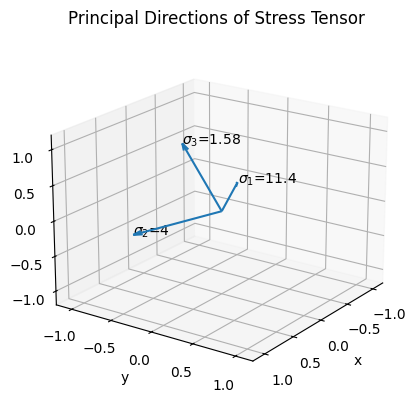

In [6]:
import numpy as np
# from stress_eigviz import visualize_stress_tensor

S = np.array([[10, 3, 0],
              [ 3, 5, 1],
              [ 0, 1, 2]], dtype=float)

sigmas, V = visualize_stress_tensor(S, axis_len=1.0)
# sigmas -> [σ1, σ2, σ3] (descending)
# V[:,0], V[:,1], V[:,2] -> unit eigenvectors for σ1, σ2, σ3
